# 02: Training...


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from rxwgan.extra import binary_wgangp_optimizer
from rxwgan.models import Model_gan_v1 as Model
from rxwgan.metrics import sp_metric, pd_metric, fa_metric



from sklearn.model_selection import StratifiedKFold

import tensorflow as tf

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
path = '/home/jodafons/public/bric_data/Shenzhen/raw/Shenzhen_table_from_raw.csv'

In [3]:
discr = tf.keras.models.load_model('output/discriminator.h5',custom_objects={'sp':sp_metric,'pd':pd_metric,'fa':fa_metric} )

In [8]:
dataframe = pd.read_csv(path)
target = dataframe.target.values

# kfold
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 512)

# image generator
datagen = ImageDataGenerator( rescale=1./255 )

batch_size = 32
models_per_fold = []
history_per_fold = []

## Train Model:

Reshape each image to 128 X 128 and rescale all to gray (1/255). Reading all from tuberculoses rx images

In [25]:

for fold, (train_idx, val_idx) in enumerate(kf.split(dataframe , target)):
    
    output_dir = 'output/fold%d'%fold
    
    training_data   = dataframe.iloc[train_idx]
    validation_data = dataframe.iloc[val_idx]
    gan_tb = Model(trainable=True, verbose=False)
    gan_notb = Model(trainable=True, verbose=False)
    
    train_generator = datagen.flow_from_dataframe(training_data, directory = None,
                                                  x_col = 'raw_image_path', 
                                                  y_col = 'target',
                                                  batch_size = batch_size,
                                                  target_size = (128,128), 
                                                  class_mode = 'raw', 
                                                  shuffle = False,
                                                  color_mode = 'grayscale')
    
    val_generator   = datagen.flow_from_dataframe(validation_data, directory = None,
                                                  x_col = 'raw_image_path', 
                                                  y_col = 'target',
                                                  batch_size = batch_size,
                                                  class_mode = 'raw',
                                                  target_size = (128,128),
                                                  shuffle = False,
                                                  color_mode = 'grayscale')
    
    optimizer = binary_wgangp_optimizer( discr, gan_tb, gan_notb, n_discr=0, max_epochs=1000, disp_for_each = 5, save_for_each=5 )
    
    history = optimizer.fit( train_generator , val_generator )
    
    break

Found 529 validated image filenames.
Found 133 validated image filenames.
This machine has 2 GPUs.


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 0. Training 0.0% complete. test_sp: 0.065 , test_pd: 0.152, test_fa: 0.504


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 1. Training 0.1% complete. test_sp: 0.276 , test_pd: 0.245, test_fa: 0.063


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 2. Training 0.2% complete. test_sp: 0.624 , test_pd: 0.698, test_fa: 0.272


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 3. Training 0.3% complete. test_sp: 0.431 , test_pd: 0.663, test_fa: 0.710


training: 100%|█████████████| 17/17 [01:00<00:00,  3.59s/it]


Epoch: 4. Training 0.4% complete. test_sp: 0.803 , test_pd: 0.816, test_fa: 0.207


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 5. Training 0.5% complete. test_sp: 0.726 , test_pd: 0.836, test_fa: 0.359


training: 100%|█████████████| 17/17 [01:01<00:00,  3.59s/it]


Epoch: 6. Training 0.6% complete. test_sp: 0.825 , test_pd: 0.901, test_fa: 0.241


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 7. Training 0.7% complete. test_sp: 0.731 , test_pd: 0.598, test_fa: 0.081


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 8. Training 0.8% complete. test_sp: 0.794 , test_pd: 0.717, test_fa: 0.101


training: 100%|█████████████| 17/17 [01:01<00:00,  3.59s/it]


Epoch: 9. Training 0.9% complete. test_sp: 0.917 , test_pd: 0.888, test_fa: 0.050


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 10. Training 1.0% complete. test_sp: 0.920 , test_pd: 0.879, test_fa: 0.029


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 11. Training 1.1% complete. test_sp: 0.850 , test_pd: 0.744, test_fa: 0.014


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 12. Training 1.2% complete. test_sp: 0.964 , test_pd: 0.948, test_fa: 0.016


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 13. Training 1.3% complete. test_sp: 0.908 , test_pd: 0.871, test_fa: 0.039


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 14. Training 1.4% complete. test_sp: 0.887 , test_pd: 0.808, test_fa: 0.015


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 15. Training 1.5% complete. test_sp: 0.877 , test_pd: 0.843, test_fa: 0.075


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 16. Training 1.6% complete. test_sp: 0.939 , test_pd: 0.938, test_fa: 0.058


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 17. Training 1.7% complete. test_sp: 0.865 , test_pd: 0.797, test_fa: 0.052


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 18. Training 1.8% complete. test_sp: 0.948 , test_pd: 0.972, test_fa: 0.076


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 19. Training 1.9% complete. test_sp: 0.906 , test_pd: 0.832, test_fa: 0.008


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 20. Training 2.0% complete. test_sp: 0.958 , test_pd: 0.974, test_fa: 0.058


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 21. Training 2.1% complete. test_sp: 0.942 , test_pd: 0.919, test_fa: 0.034


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 22. Training 2.2% complete. test_sp: 0.982 , test_pd: 0.992, test_fa: 0.028


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 23. Training 2.3% complete. test_sp: 0.957 , test_pd: 0.968, test_fa: 0.053


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 24. Training 2.4% complete. test_sp: 0.963 , test_pd: 0.972, test_fa: 0.045


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 25. Training 2.5% complete. test_sp: 0.941 , test_pd: 0.932, test_fa: 0.049


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 26. Training 2.6% complete. test_sp: 0.967 , test_pd: 0.964, test_fa: 0.029


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 27. Training 2.7% complete. test_sp: 0.938 , test_pd: 0.934, test_fa: 0.057


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 28. Training 2.8% complete. test_sp: 0.876 , test_pd: 0.816, test_fa: 0.055


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 29. Training 2.9% complete. test_sp: 0.915 , test_pd: 0.911, test_fa: 0.081


training: 100%|█████████████| 17/17 [01:04<00:00,  3.79s/it]


Epoch: 30. Training 3.0% complete. test_sp: 0.901 , test_pd: 0.863, test_fa: 0.061


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 31. Training 3.1% complete. test_sp: 0.891 , test_pd: 0.849, test_fa: 0.066


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 32. Training 3.2% complete. test_sp: 0.873 , test_pd: 0.836, test_fa: 0.088


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 33. Training 3.3% complete. test_sp: 0.876 , test_pd: 0.832, test_fa: 0.078


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 34. Training 3.4% complete. test_sp: 0.853 , test_pd: 0.784, test_fa: 0.074


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 35. Training 3.5% complete. test_sp: 0.875 , test_pd: 0.829, test_fa: 0.077


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 36. Training 3.6% complete. test_sp: 0.869 , test_pd: 0.800, test_fa: 0.059


training: 100%|█████████████| 17/17 [01:02<00:00,  3.71s/it]


Epoch: 37. Training 3.7% complete. test_sp: 0.838 , test_pd: 0.776, test_fa: 0.093


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 38. Training 3.8% complete. test_sp: 0.863 , test_pd: 0.823, test_fa: 0.096


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 39. Training 3.9% complete. test_sp: 0.854 , test_pd: 0.791, test_fa: 0.079


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 40. Training 4.0% complete. test_sp: 0.848 , test_pd: 0.791, test_fa: 0.091


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 41. Training 4.1% complete. test_sp: 0.859 , test_pd: 0.809, test_fa: 0.088


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 42. Training 4.2% complete. test_sp: 0.875 , test_pd: 0.824, test_fa: 0.071


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 43. Training 4.3% complete. test_sp: 0.881 , test_pd: 0.838, test_fa: 0.075


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 44. Training 4.4% complete. test_sp: 0.871 , test_pd: 0.863, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 45. Training 4.5% complete. test_sp: 0.867 , test_pd: 0.817, test_fa: 0.079


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 46. Training 4.6% complete. test_sp: 0.872 , test_pd: 0.816, test_fa: 0.069


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 47. Training 4.7% complete. test_sp: 0.851 , test_pd: 0.807, test_fa: 0.101


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 48. Training 4.8% complete. test_sp: 0.863 , test_pd: 0.831, test_fa: 0.103


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 49. Training 4.9% complete. test_sp: 0.797 , test_pd: 0.719, test_fa: 0.109


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 50. Training 5.0% complete. test_sp: 0.833 , test_pd: 0.792, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 51. Training 5.1% complete. test_sp: 0.834 , test_pd: 0.773, test_fa: 0.099


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 52. Training 5.2% complete. test_sp: 0.858 , test_pd: 0.826, test_fa: 0.107


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 53. Training 5.3% complete. test_sp: 0.885 , test_pd: 0.854, test_fa: 0.082


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 54. Training 5.4% complete. test_sp: 0.853 , test_pd: 0.818, test_fa: 0.109


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 55. Training 5.5% complete. test_sp: 0.823 , test_pd: 0.780, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 56. Training 5.6% complete. test_sp: 0.876 , test_pd: 0.873, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 57. Training 5.7% complete. test_sp: 0.812 , test_pd: 0.752, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 58. Training 5.8% complete. test_sp: 0.864 , test_pd: 0.839, test_fa: 0.109


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 59. Training 5.9% complete. test_sp: 0.848 , test_pd: 0.822, test_fa: 0.123


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 60. Training 6.0% complete. test_sp: 0.830 , test_pd: 0.802, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 61. Training 6.1% complete. test_sp: 0.843 , test_pd: 0.840, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 62. Training 6.2% complete. test_sp: 0.840 , test_pd: 0.799, test_fa: 0.114


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 63. Training 6.3% complete. test_sp: 0.846 , test_pd: 0.819, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 64. Training 6.4% complete. test_sp: 0.878 , test_pd: 0.884, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:04<00:00,  3.80s/it]


Epoch: 65. Training 6.5% complete. test_sp: 0.828 , test_pd: 0.783, test_fa: 0.123


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 66. Training 6.6% complete. test_sp: 0.807 , test_pd: 0.750, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 67. Training 6.7% complete. test_sp: 0.859 , test_pd: 0.851, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 68. Training 6.8% complete. test_sp: 0.836 , test_pd: 0.817, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 69. Training 6.9% complete. test_sp: 0.817 , test_pd: 0.784, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 70. Training 7.0% complete. test_sp: 0.865 , test_pd: 0.875, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 71. Training 7.1% complete. test_sp: 0.818 , test_pd: 0.761, test_fa: 0.119


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 72. Training 7.2% complete. test_sp: 0.825 , test_pd: 0.797, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 73. Training 7.3% complete. test_sp: 0.873 , test_pd: 0.856, test_fa: 0.108


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 74. Training 7.4% complete. test_sp: 0.824 , test_pd: 0.779, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 75. Training 7.5% complete. test_sp: 0.815 , test_pd: 0.776, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 76. Training 7.6% complete. test_sp: 0.888 , test_pd: 0.903, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 77. Training 7.7% complete. test_sp: 0.847 , test_pd: 0.829, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 78. Training 7.8% complete. test_sp: 0.850 , test_pd: 0.829, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 79. Training 7.9% complete. test_sp: 0.873 , test_pd: 0.867, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 80. Training 8.0% complete. test_sp: 0.883 , test_pd: 0.904, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 81. Training 8.1% complete. test_sp: 0.865 , test_pd: 0.832, test_fa: 0.096


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 82. Training 8.2% complete. test_sp: 0.891 , test_pd: 0.895, test_fa: 0.111


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 83. Training 8.3% complete. test_sp: 0.912 , test_pd: 0.919, test_fa: 0.093


training: 100%|█████████████| 17/17 [01:00<00:00,  3.56s/it]


Epoch: 84. Training 8.4% complete. test_sp: 0.844 , test_pd: 0.807, test_fa: 0.114


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 85. Training 8.5% complete. test_sp: 0.890 , test_pd: 0.909, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 86. Training 8.6% complete. test_sp: 0.830 , test_pd: 0.792, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 87. Training 8.7% complete. test_sp: 0.868 , test_pd: 0.864, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 88. Training 8.8% complete. test_sp: 0.878 , test_pd: 0.892, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 89. Training 8.9% complete. test_sp: 0.822 , test_pd: 0.794, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 90. Training 9.0% complete. test_sp: 0.878 , test_pd: 0.904, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 91. Training 9.1% complete. test_sp: 0.842 , test_pd: 0.821, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 92. Training 9.2% complete. test_sp: 0.848 , test_pd: 0.839, test_fa: 0.140


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 93. Training 9.3% complete. test_sp: 0.845 , test_pd: 0.826, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 94. Training 9.4% complete. test_sp: 0.810 , test_pd: 0.754, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 95. Training 9.5% complete. test_sp: 0.860 , test_pd: 0.873, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 96. Training 9.6% complete. test_sp: 0.824 , test_pd: 0.776, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 97. Training 9.7% complete. test_sp: 0.848 , test_pd: 0.836, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 98. Training 9.8% complete. test_sp: 0.860 , test_pd: 0.848, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 99. Training 9.9% complete. test_sp: 0.858 , test_pd: 0.842, test_fa: 0.124


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 100. Training 10.0% complete. test_sp: 0.859 , test_pd: 0.843, test_fa: 0.123


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 101. Training 10.1% complete. test_sp: 0.830 , test_pd: 0.811, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 102. Training 10.2% complete. test_sp: 0.804 , test_pd: 0.766, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 103. Training 10.3% complete. test_sp: 0.864 , test_pd: 0.848, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 104. Training 10.4% complete. test_sp: 0.836 , test_pd: 0.814, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 105. Training 10.5% complete. test_sp: 0.846 , test_pd: 0.828, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 106. Training 10.6% complete. test_sp: 0.875 , test_pd: 0.882, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 107. Training 10.7% complete. test_sp: 0.844 , test_pd: 0.831, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 108. Training 10.8% complete. test_sp: 0.833 , test_pd: 0.801, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 109. Training 10.9% complete. test_sp: 0.843 , test_pd: 0.848, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 110. Training 11.0% complete. test_sp: 0.818 , test_pd: 0.758, test_fa: 0.117


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 111. Training 11.1% complete. test_sp: 0.847 , test_pd: 0.831, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 112. Training 11.2% complete. test_sp: 0.830 , test_pd: 0.809, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 113. Training 11.3% complete. test_sp: 0.842 , test_pd: 0.844, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 114. Training 11.4% complete. test_sp: 0.832 , test_pd: 0.814, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 115. Training 11.5% complete. test_sp: 0.845 , test_pd: 0.843, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 116. Training 11.6% complete. test_sp: 0.872 , test_pd: 0.872, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 117. Training 11.7% complete. test_sp: 0.891 , test_pd: 0.890, test_fa: 0.108


training: 100%|█████████████| 17/17 [01:00<00:00,  3.55s/it]


Epoch: 118. Training 11.8% complete. test_sp: 0.849 , test_pd: 0.841, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 119. Training 11.9% complete. test_sp: 0.870 , test_pd: 0.844, test_fa: 0.101


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 120. Training 12.0% complete. test_sp: 0.845 , test_pd: 0.844, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 121. Training 12.1% complete. test_sp: 0.846 , test_pd: 0.842, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 122. Training 12.2% complete. test_sp: 0.868 , test_pd: 0.859, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 123. Training 12.3% complete. test_sp: 0.832 , test_pd: 0.834, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 124. Training 12.4% complete. test_sp: 0.864 , test_pd: 0.865, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 125. Training 12.5% complete. test_sp: 0.859 , test_pd: 0.854, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 126. Training 12.6% complete. test_sp: 0.836 , test_pd: 0.807, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 127. Training 12.7% complete. test_sp: 0.848 , test_pd: 0.848, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 128. Training 12.8% complete. test_sp: 0.842 , test_pd: 0.876, test_fa: 0.189


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 129. Training 12.9% complete. test_sp: 0.852 , test_pd: 0.865, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 130. Training 13.0% complete. test_sp: 0.853 , test_pd: 0.857, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 131. Training 13.1% complete. test_sp: 0.850 , test_pd: 0.856, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 132. Training 13.2% complete. test_sp: 0.840 , test_pd: 0.834, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 133. Training 13.3% complete. test_sp: 0.828 , test_pd: 0.858, test_fa: 0.199


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 134. Training 13.4% complete. test_sp: 0.838 , test_pd: 0.864, test_fa: 0.187


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 135. Training 13.5% complete. test_sp: 0.852 , test_pd: 0.862, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 136. Training 13.6% complete. test_sp: 0.834 , test_pd: 0.846, test_fa: 0.177


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 137. Training 13.7% complete. test_sp: 0.840 , test_pd: 0.831, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 138. Training 13.8% complete. test_sp: 0.847 , test_pd: 0.858, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 139. Training 13.9% complete. test_sp: 0.838 , test_pd: 0.830, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 140. Training 14.0% complete. test_sp: 0.847 , test_pd: 0.869, test_fa: 0.175


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 141. Training 14.1% complete. test_sp: 0.845 , test_pd: 0.841, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 142. Training 14.2% complete. test_sp: 0.831 , test_pd: 0.823, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 143. Training 14.3% complete. test_sp: 0.821 , test_pd: 0.797, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 144. Training 14.4% complete. test_sp: 0.819 , test_pd: 0.811, test_fa: 0.171


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 145. Training 14.5% complete. test_sp: 0.846 , test_pd: 0.857, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 146. Training 14.6% complete. test_sp: 0.846 , test_pd: 0.864, test_fa: 0.171


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 147. Training 14.7% complete. test_sp: 0.827 , test_pd: 0.804, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 148. Training 14.8% complete. test_sp: 0.836 , test_pd: 0.826, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 149. Training 14.9% complete. test_sp: 0.844 , test_pd: 0.836, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 150. Training 15.0% complete. test_sp: 0.851 , test_pd: 0.858, test_fa: 0.155


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 151. Training 15.1% complete. test_sp: 0.836 , test_pd: 0.853, test_fa: 0.179


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 152. Training 15.2% complete. test_sp: 0.847 , test_pd: 0.843, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 153. Training 15.3% complete. test_sp: 0.829 , test_pd: 0.833, test_fa: 0.173


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 154. Training 15.4% complete. test_sp: 0.845 , test_pd: 0.861, test_fa: 0.169


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 155. Training 15.5% complete. test_sp: 0.851 , test_pd: 0.856, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 156. Training 15.6% complete. test_sp: 0.842 , test_pd: 0.838, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 157. Training 15.7% complete. test_sp: 0.820 , test_pd: 0.797, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 158. Training 15.8% complete. test_sp: 0.801 , test_pd: 0.799, test_fa: 0.195


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 159. Training 15.9% complete. test_sp: 0.835 , test_pd: 0.828, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 160. Training 16.0% complete. test_sp: 0.871 , test_pd: 0.881, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 161. Training 16.1% complete. test_sp: 0.863 , test_pd: 0.876, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:04<00:00,  3.80s/it]


Epoch: 162. Training 16.2% complete. test_sp: 0.871 , test_pd: 0.883, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 163. Training 16.3% complete. test_sp: 0.844 , test_pd: 0.864, test_fa: 0.174


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 164. Training 16.4% complete. test_sp: 0.848 , test_pd: 0.842, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:04<00:00,  3.81s/it]


Epoch: 165. Training 16.5% complete. test_sp: 0.831 , test_pd: 0.811, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 166. Training 16.6% complete. test_sp: 0.846 , test_pd: 0.818, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 167. Training 16.7% complete. test_sp: 0.833 , test_pd: 0.793, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 168. Training 16.8% complete. test_sp: 0.825 , test_pd: 0.834, test_fa: 0.182


training: 100%|█████████████| 17/17 [01:01<00:00,  3.59s/it]


Epoch: 169. Training 16.9% complete. test_sp: 0.846 , test_pd: 0.829, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 170. Training 17.0% complete. test_sp: 0.829 , test_pd: 0.773, test_fa: 0.111


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 171. Training 17.1% complete. test_sp: 0.800 , test_pd: 0.794, test_fa: 0.191


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 172. Training 17.2% complete. test_sp: 0.855 , test_pd: 0.858, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 173. Training 17.3% complete. test_sp: 0.845 , test_pd: 0.780, test_fa: 0.083


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 174. Training 17.4% complete. test_sp: 0.839 , test_pd: 0.810, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 175. Training 17.5% complete. test_sp: 0.853 , test_pd: 0.829, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 176. Training 17.6% complete. test_sp: 0.834 , test_pd: 0.826, test_fa: 0.155


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 177. Training 17.7% complete. test_sp: 0.836 , test_pd: 0.832, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 178. Training 17.8% complete. test_sp: 0.866 , test_pd: 0.821, test_fa: 0.083


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 179. Training 17.9% complete. test_sp: 0.817 , test_pd: 0.764, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 180. Training 18.0% complete. test_sp: 0.883 , test_pd: 0.884, test_fa: 0.117


training: 100%|█████████████| 17/17 [01:01<00:00,  3.59s/it]


Epoch: 181. Training 18.1% complete. test_sp: 0.827 , test_pd: 0.771, test_fa: 0.111


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 182. Training 18.2% complete. test_sp: 0.844 , test_pd: 0.797, test_fa: 0.104


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 183. Training 18.3% complete. test_sp: 0.825 , test_pd: 0.814, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 184. Training 18.4% complete. test_sp: 0.842 , test_pd: 0.815, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 185. Training 18.5% complete. test_sp: 0.861 , test_pd: 0.888, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:00<00:00,  3.56s/it]


Epoch: 186. Training 18.6% complete. test_sp: 0.813 , test_pd: 0.781, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 187. Training 18.7% complete. test_sp: 0.870 , test_pd: 0.861, test_fa: 0.120


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 188. Training 18.8% complete. test_sp: 0.851 , test_pd: 0.866, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 189. Training 18.9% complete. test_sp: 0.832 , test_pd: 0.811, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 190. Training 19.0% complete. test_sp: 0.827 , test_pd: 0.815, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 191. Training 19.1% complete. test_sp: 0.851 , test_pd: 0.879, test_fa: 0.177


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 192. Training 19.2% complete. test_sp: 0.867 , test_pd: 0.866, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 193. Training 19.3% complete. test_sp: 0.865 , test_pd: 0.870, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 194. Training 19.4% complete. test_sp: 0.828 , test_pd: 0.776, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 195. Training 19.5% complete. test_sp: 0.862 , test_pd: 0.849, test_fa: 0.124


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 196. Training 19.6% complete. test_sp: 0.843 , test_pd: 0.821, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 197. Training 19.7% complete. test_sp: 0.855 , test_pd: 0.840, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 198. Training 19.8% complete. test_sp: 0.842 , test_pd: 0.834, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 199. Training 19.9% complete. test_sp: 0.846 , test_pd: 0.829, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 200. Training 20.0% complete. test_sp: 0.849 , test_pd: 0.833, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 201. Training 20.1% complete. test_sp: 0.831 , test_pd: 0.782, test_fa: 0.115


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 202. Training 20.2% complete. test_sp: 0.849 , test_pd: 0.857, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 203. Training 20.3% complete. test_sp: 0.866 , test_pd: 0.866, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 204. Training 20.4% complete. test_sp: 0.847 , test_pd: 0.854, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 205. Training 20.5% complete. test_sp: 0.861 , test_pd: 0.859, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 206. Training 20.6% complete. test_sp: 0.841 , test_pd: 0.816, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 207. Training 20.7% complete. test_sp: 0.817 , test_pd: 0.804, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 208. Training 20.8% complete. test_sp: 0.849 , test_pd: 0.854, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 209. Training 20.9% complete. test_sp: 0.832 , test_pd: 0.814, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 210. Training 21.0% complete. test_sp: 0.823 , test_pd: 0.814, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 211. Training 21.1% complete. test_sp: 0.841 , test_pd: 0.837, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 212. Training 21.2% complete. test_sp: 0.824 , test_pd: 0.791, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 213. Training 21.3% complete. test_sp: 0.860 , test_pd: 0.862, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 214. Training 21.4% complete. test_sp: 0.834 , test_pd: 0.798, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 215. Training 21.5% complete. test_sp: 0.845 , test_pd: 0.841, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 216. Training 21.6% complete. test_sp: 0.847 , test_pd: 0.851, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 217. Training 21.7% complete. test_sp: 0.818 , test_pd: 0.784, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 218. Training 21.8% complete. test_sp: 0.848 , test_pd: 0.856, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 219. Training 21.9% complete. test_sp: 0.820 , test_pd: 0.797, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 220. Training 22.0% complete. test_sp: 0.831 , test_pd: 0.837, test_fa: 0.173


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 221. Training 22.1% complete. test_sp: 0.857 , test_pd: 0.871, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 222. Training 22.2% complete. test_sp: 0.822 , test_pd: 0.771, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 223. Training 22.3% complete. test_sp: 0.847 , test_pd: 0.849, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 224. Training 22.4% complete. test_sp: 0.843 , test_pd: 0.849, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 225. Training 22.5% complete. test_sp: 0.820 , test_pd: 0.813, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 226. Training 22.6% complete. test_sp: 0.846 , test_pd: 0.863, test_fa: 0.170


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 227. Training 22.7% complete. test_sp: 0.861 , test_pd: 0.838, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 228. Training 22.8% complete. test_sp: 0.864 , test_pd: 0.843, test_fa: 0.113


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 229. Training 22.9% complete. test_sp: 0.850 , test_pd: 0.853, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:04<00:00,  3.80s/it]


Epoch: 230. Training 23.0% complete. test_sp: 0.840 , test_pd: 0.817, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 231. Training 23.1% complete. test_sp: 0.838 , test_pd: 0.831, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:04<00:00,  3.80s/it]


Epoch: 232. Training 23.2% complete. test_sp: 0.850 , test_pd: 0.870, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 233. Training 23.3% complete. test_sp: 0.844 , test_pd: 0.854, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 234. Training 23.4% complete. test_sp: 0.865 , test_pd: 0.861, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 235. Training 23.5% complete. test_sp: 0.854 , test_pd: 0.868, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 236. Training 23.6% complete. test_sp: 0.867 , test_pd: 0.891, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 237. Training 23.7% complete. test_sp: 0.880 , test_pd: 0.901, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 238. Training 23.8% complete. test_sp: 0.834 , test_pd: 0.819, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 239. Training 23.9% complete. test_sp: 0.868 , test_pd: 0.872, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 240. Training 24.0% complete. test_sp: 0.841 , test_pd: 0.831, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 241. Training 24.1% complete. test_sp: 0.841 , test_pd: 0.873, test_fa: 0.189


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 242. Training 24.2% complete. test_sp: 0.826 , test_pd: 0.813, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 243. Training 24.3% complete. test_sp: 0.851 , test_pd: 0.843, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 244. Training 24.4% complete. test_sp: 0.848 , test_pd: 0.819, test_fa: 0.119


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 245. Training 24.5% complete. test_sp: 0.828 , test_pd: 0.789, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 246. Training 24.6% complete. test_sp: 0.851 , test_pd: 0.847, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 247. Training 24.7% complete. test_sp: 0.860 , test_pd: 0.858, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 248. Training 24.8% complete. test_sp: 0.825 , test_pd: 0.790, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 249. Training 24.9% complete. test_sp: 0.855 , test_pd: 0.861, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 250. Training 25.0% complete. test_sp: 0.835 , test_pd: 0.833, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 251. Training 25.1% complete. test_sp: 0.860 , test_pd: 0.870, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 252. Training 25.2% complete. test_sp: 0.866 , test_pd: 0.861, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 253. Training 25.3% complete. test_sp: 0.853 , test_pd: 0.849, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:00<00:00,  3.56s/it]


Epoch: 254. Training 25.4% complete. test_sp: 0.844 , test_pd: 0.843, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 255. Training 25.5% complete. test_sp: 0.863 , test_pd: 0.874, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 256. Training 25.6% complete. test_sp: 0.826 , test_pd: 0.814, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 257. Training 25.7% complete. test_sp: 0.847 , test_pd: 0.856, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 258. Training 25.8% complete. test_sp: 0.841 , test_pd: 0.852, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 259. Training 25.9% complete. test_sp: 0.839 , test_pd: 0.837, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 260. Training 26.0% complete. test_sp: 0.844 , test_pd: 0.863, test_fa: 0.173


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 261. Training 26.1% complete. test_sp: 0.831 , test_pd: 0.827, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 262. Training 26.2% complete. test_sp: 0.861 , test_pd: 0.878, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 263. Training 26.3% complete. test_sp: 0.851 , test_pd: 0.849, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 264. Training 26.4% complete. test_sp: 0.831 , test_pd: 0.814, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:04<00:00,  3.79s/it]


Epoch: 265. Training 26.5% complete. test_sp: 0.847 , test_pd: 0.831, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 266. Training 26.6% complete. test_sp: 0.833 , test_pd: 0.820, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 267. Training 26.7% complete. test_sp: 0.858 , test_pd: 0.859, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 268. Training 26.8% complete. test_sp: 0.823 , test_pd: 0.827, test_fa: 0.178


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 269. Training 26.9% complete. test_sp: 0.849 , test_pd: 0.866, test_fa: 0.166


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 270. Training 27.0% complete. test_sp: 0.873 , test_pd: 0.877, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 271. Training 27.1% complete. test_sp: 0.831 , test_pd: 0.813, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 272. Training 27.2% complete. test_sp: 0.836 , test_pd: 0.834, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 273. Training 27.3% complete. test_sp: 0.862 , test_pd: 0.873, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 274. Training 27.4% complete. test_sp: 0.858 , test_pd: 0.872, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 275. Training 27.5% complete. test_sp: 0.841 , test_pd: 0.849, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 276. Training 27.6% complete. test_sp: 0.855 , test_pd: 0.848, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 277. Training 27.7% complete. test_sp: 0.846 , test_pd: 0.846, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 278. Training 27.8% complete. test_sp: 0.857 , test_pd: 0.852, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 279. Training 27.9% complete. test_sp: 0.839 , test_pd: 0.839, test_fa: 0.160


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 280. Training 28.0% complete. test_sp: 0.847 , test_pd: 0.844, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 281. Training 28.1% complete. test_sp: 0.833 , test_pd: 0.810, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 282. Training 28.2% complete. test_sp: 0.847 , test_pd: 0.825, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 283. Training 28.3% complete. test_sp: 0.841 , test_pd: 0.846, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 284. Training 28.4% complete. test_sp: 0.839 , test_pd: 0.801, test_fa: 0.120


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 285. Training 28.5% complete. test_sp: 0.855 , test_pd: 0.862, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 286. Training 28.6% complete. test_sp: 0.797 , test_pd: 0.778, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 287. Training 28.7% complete. test_sp: 0.852 , test_pd: 0.827, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 288. Training 28.8% complete. test_sp: 0.836 , test_pd: 0.829, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 289. Training 28.9% complete. test_sp: 0.858 , test_pd: 0.863, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 290. Training 29.0% complete. test_sp: 0.849 , test_pd: 0.827, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 291. Training 29.1% complete. test_sp: 0.837 , test_pd: 0.852, test_fa: 0.177


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 292. Training 29.2% complete. test_sp: 0.837 , test_pd: 0.807, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 293. Training 29.3% complete. test_sp: 0.862 , test_pd: 0.859, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 294. Training 29.4% complete. test_sp: 0.863 , test_pd: 0.860, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 295. Training 29.5% complete. test_sp: 0.847 , test_pd: 0.816, test_fa: 0.119


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 296. Training 29.6% complete. test_sp: 0.860 , test_pd: 0.854, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 297. Training 29.7% complete. test_sp: 0.842 , test_pd: 0.845, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 298. Training 29.8% complete. test_sp: 0.879 , test_pd: 0.873, test_fa: 0.114


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 299. Training 29.9% complete. test_sp: 0.839 , test_pd: 0.874, test_fa: 0.192


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 300. Training 30.0% complete. test_sp: 0.843 , test_pd: 0.831, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 301. Training 30.1% complete. test_sp: 0.847 , test_pd: 0.837, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 302. Training 30.2% complete. test_sp: 0.843 , test_pd: 0.845, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 303. Training 30.3% complete. test_sp: 0.843 , test_pd: 0.817, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 304. Training 30.4% complete. test_sp: 0.852 , test_pd: 0.844, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 305. Training 30.5% complete. test_sp: 0.838 , test_pd: 0.832, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 306. Training 30.6% complete. test_sp: 0.844 , test_pd: 0.861, test_fa: 0.170


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 307. Training 30.7% complete. test_sp: 0.866 , test_pd: 0.868, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 308. Training 30.8% complete. test_sp: 0.834 , test_pd: 0.825, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 309. Training 30.9% complete. test_sp: 0.858 , test_pd: 0.856, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 310. Training 31.0% complete. test_sp: 0.826 , test_pd: 0.815, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 311. Training 31.1% complete. test_sp: 0.857 , test_pd: 0.853, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 312. Training 31.2% complete. test_sp: 0.828 , test_pd: 0.831, test_fa: 0.174


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 313. Training 31.3% complete. test_sp: 0.830 , test_pd: 0.831, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 314. Training 31.4% complete. test_sp: 0.855 , test_pd: 0.882, test_fa: 0.171


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 315. Training 31.5% complete. test_sp: 0.857 , test_pd: 0.849, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 316. Training 31.6% complete. test_sp: 0.852 , test_pd: 0.847, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 317. Training 31.7% complete. test_sp: 0.838 , test_pd: 0.849, test_fa: 0.172


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 318. Training 31.8% complete. test_sp: 0.845 , test_pd: 0.850, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 319. Training 31.9% complete. test_sp: 0.867 , test_pd: 0.874, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 320. Training 32.0% complete. test_sp: 0.845 , test_pd: 0.831, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 321. Training 32.1% complete. test_sp: 0.854 , test_pd: 0.864, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 322. Training 32.2% complete. test_sp: 0.845 , test_pd: 0.848, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 323. Training 32.3% complete. test_sp: 0.856 , test_pd: 0.849, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 324. Training 32.4% complete. test_sp: 0.842 , test_pd: 0.804, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 325. Training 32.5% complete. test_sp: 0.835 , test_pd: 0.851, test_fa: 0.179


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 326. Training 32.6% complete. test_sp: 0.861 , test_pd: 0.865, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 327. Training 32.7% complete. test_sp: 0.821 , test_pd: 0.822, test_fa: 0.177


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 328. Training 32.8% complete. test_sp: 0.832 , test_pd: 0.831, test_fa: 0.166


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 329. Training 32.9% complete. test_sp: 0.853 , test_pd: 0.857, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 330. Training 33.0% complete. test_sp: 0.841 , test_pd: 0.804, test_fa: 0.120


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 331. Training 33.1% complete. test_sp: 0.837 , test_pd: 0.844, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 332. Training 33.2% complete. test_sp: 0.835 , test_pd: 0.834, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 333. Training 33.3% complete. test_sp: 0.871 , test_pd: 0.888, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 334. Training 33.4% complete. test_sp: 0.859 , test_pd: 0.867, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 335. Training 33.5% complete. test_sp: 0.833 , test_pd: 0.813, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 336. Training 33.6% complete. test_sp: 0.854 , test_pd: 0.863, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 337. Training 33.7% complete. test_sp: 0.847 , test_pd: 0.831, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 338. Training 33.8% complete. test_sp: 0.874 , test_pd: 0.871, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 339. Training 33.9% complete. test_sp: 0.854 , test_pd: 0.870, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 340. Training 34.0% complete. test_sp: 0.821 , test_pd: 0.788, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 341. Training 34.1% complete. test_sp: 0.864 , test_pd: 0.865, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 342. Training 34.2% complete. test_sp: 0.833 , test_pd: 0.857, test_fa: 0.188


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 343. Training 34.3% complete. test_sp: 0.848 , test_pd: 0.842, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 344. Training 34.4% complete. test_sp: 0.857 , test_pd: 0.858, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 345. Training 34.5% complete. test_sp: 0.861 , test_pd: 0.852, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 346. Training 34.6% complete. test_sp: 0.849 , test_pd: 0.868, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 347. Training 34.7% complete. test_sp: 0.851 , test_pd: 0.837, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.59s/it]


Epoch: 348. Training 34.8% complete. test_sp: 0.833 , test_pd: 0.834, test_fa: 0.165


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 349. Training 34.9% complete. test_sp: 0.832 , test_pd: 0.851, test_fa: 0.184


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 350. Training 35.0% complete. test_sp: 0.829 , test_pd: 0.813, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 351. Training 35.1% complete. test_sp: 0.854 , test_pd: 0.856, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 352. Training 35.2% complete. test_sp: 0.871 , test_pd: 0.874, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 353. Training 35.3% complete. test_sp: 0.843 , test_pd: 0.849, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 354. Training 35.4% complete. test_sp: 0.847 , test_pd: 0.864, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 355. Training 35.5% complete. test_sp: 0.828 , test_pd: 0.823, test_fa: 0.165


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 356. Training 35.6% complete. test_sp: 0.848 , test_pd: 0.843, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 357. Training 35.7% complete. test_sp: 0.855 , test_pd: 0.865, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 358. Training 35.8% complete. test_sp: 0.831 , test_pd: 0.823, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 359. Training 35.9% complete. test_sp: 0.826 , test_pd: 0.774, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 360. Training 36.0% complete. test_sp: 0.846 , test_pd: 0.857, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 361. Training 36.1% complete. test_sp: 0.804 , test_pd: 0.764, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 362. Training 36.2% complete. test_sp: 0.853 , test_pd: 0.866, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 363. Training 36.3% complete. test_sp: 0.815 , test_pd: 0.811, test_fa: 0.177


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 364. Training 36.4% complete. test_sp: 0.853 , test_pd: 0.849, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 365. Training 36.5% complete. test_sp: 0.864 , test_pd: 0.876, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 366. Training 36.6% complete. test_sp: 0.864 , test_pd: 0.864, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 367. Training 36.7% complete. test_sp: 0.838 , test_pd: 0.846, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 368. Training 36.8% complete. test_sp: 0.841 , test_pd: 0.833, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 369. Training 36.9% complete. test_sp: 0.856 , test_pd: 0.854, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 370. Training 37.0% complete. test_sp: 0.854 , test_pd: 0.868, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 371. Training 37.1% complete. test_sp: 0.844 , test_pd: 0.873, test_fa: 0.185


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 372. Training 37.2% complete. test_sp: 0.864 , test_pd: 0.869, test_fa: 0.140


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 373. Training 37.3% complete. test_sp: 0.855 , test_pd: 0.848, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 374. Training 37.4% complete. test_sp: 0.857 , test_pd: 0.869, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 375. Training 37.5% complete. test_sp: 0.851 , test_pd: 0.840, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 376. Training 37.6% complete. test_sp: 0.863 , test_pd: 0.886, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 377. Training 37.7% complete. test_sp: 0.839 , test_pd: 0.830, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 378. Training 37.8% complete. test_sp: 0.884 , test_pd: 0.904, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 379. Training 37.9% complete. test_sp: 0.842 , test_pd: 0.834, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 380. Training 38.0% complete. test_sp: 0.850 , test_pd: 0.846, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 381. Training 38.1% complete. test_sp: 0.841 , test_pd: 0.831, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 382. Training 38.2% complete. test_sp: 0.847 , test_pd: 0.839, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 383. Training 38.3% complete. test_sp: 0.826 , test_pd: 0.803, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 384. Training 38.4% complete. test_sp: 0.863 , test_pd: 0.867, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 385. Training 38.5% complete. test_sp: 0.865 , test_pd: 0.843, test_fa: 0.110


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 386. Training 38.6% complete. test_sp: 0.827 , test_pd: 0.812, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 387. Training 38.7% complete. test_sp: 0.817 , test_pd: 0.841, test_fa: 0.204


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 388. Training 38.8% complete. test_sp: 0.864 , test_pd: 0.877, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 389. Training 38.9% complete. test_sp: 0.839 , test_pd: 0.847, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 390. Training 39.0% complete. test_sp: 0.831 , test_pd: 0.848, test_fa: 0.182


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 391. Training 39.1% complete. test_sp: 0.834 , test_pd: 0.818, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 392. Training 39.2% complete. test_sp: 0.844 , test_pd: 0.859, test_fa: 0.169


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 393. Training 39.3% complete. test_sp: 0.838 , test_pd: 0.845, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 394. Training 39.4% complete. test_sp: 0.826 , test_pd: 0.776, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 395. Training 39.5% complete. test_sp: 0.853 , test_pd: 0.867, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 396. Training 39.6% complete. test_sp: 0.833 , test_pd: 0.811, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 397. Training 39.7% complete. test_sp: 0.849 , test_pd: 0.870, test_fa: 0.171


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 398. Training 39.8% complete. test_sp: 0.854 , test_pd: 0.857, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 399. Training 39.9% complete. test_sp: 0.855 , test_pd: 0.844, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 400. Training 40.0% complete. test_sp: 0.859 , test_pd: 0.871, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 401. Training 40.1% complete. test_sp: 0.860 , test_pd: 0.858, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 402. Training 40.2% complete. test_sp: 0.861 , test_pd: 0.854, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 403. Training 40.3% complete. test_sp: 0.846 , test_pd: 0.823, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 404. Training 40.4% complete. test_sp: 0.852 , test_pd: 0.833, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 405. Training 40.5% complete. test_sp: 0.836 , test_pd: 0.798, test_fa: 0.119


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 406. Training 40.6% complete. test_sp: 0.847 , test_pd: 0.871, test_fa: 0.176


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 407. Training 40.7% complete. test_sp: 0.851 , test_pd: 0.839, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 408. Training 40.8% complete. test_sp: 0.844 , test_pd: 0.841, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 409. Training 40.9% complete. test_sp: 0.843 , test_pd: 0.848, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 410. Training 41.0% complete. test_sp: 0.833 , test_pd: 0.819, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 411. Training 41.1% complete. test_sp: 0.867 , test_pd: 0.851, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 412. Training 41.2% complete. test_sp: 0.833 , test_pd: 0.828, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 413. Training 41.3% complete. test_sp: 0.861 , test_pd: 0.883, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 414. Training 41.4% complete. test_sp: 0.854 , test_pd: 0.865, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 415. Training 41.5% complete. test_sp: 0.827 , test_pd: 0.797, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 416. Training 41.6% complete. test_sp: 0.846 , test_pd: 0.838, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 417. Training 41.7% complete. test_sp: 0.852 , test_pd: 0.858, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 418. Training 41.8% complete. test_sp: 0.853 , test_pd: 0.851, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 419. Training 41.9% complete. test_sp: 0.869 , test_pd: 0.871, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 420. Training 42.0% complete. test_sp: 0.839 , test_pd: 0.817, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 421. Training 42.1% complete. test_sp: 0.851 , test_pd: 0.837, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 422. Training 42.2% complete. test_sp: 0.857 , test_pd: 0.836, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 423. Training 42.3% complete. test_sp: 0.852 , test_pd: 0.856, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 424. Training 42.4% complete. test_sp: 0.839 , test_pd: 0.822, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 425. Training 42.5% complete. test_sp: 0.841 , test_pd: 0.851, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 426. Training 42.6% complete. test_sp: 0.833 , test_pd: 0.823, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 427. Training 42.7% complete. test_sp: 0.822 , test_pd: 0.796, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 428. Training 42.8% complete. test_sp: 0.816 , test_pd: 0.812, test_fa: 0.176


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 429. Training 42.9% complete. test_sp: 0.847 , test_pd: 0.848, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 430. Training 43.0% complete. test_sp: 0.846 , test_pd: 0.857, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 431. Training 43.1% complete. test_sp: 0.818 , test_pd: 0.749, test_fa: 0.107


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 432. Training 43.2% complete. test_sp: 0.866 , test_pd: 0.869, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 433. Training 43.3% complete. test_sp: 0.869 , test_pd: 0.877, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 434. Training 43.4% complete. test_sp: 0.810 , test_pd: 0.784, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 435. Training 43.5% complete. test_sp: 0.871 , test_pd: 0.889, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 436. Training 43.6% complete. test_sp: 0.819 , test_pd: 0.803, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 437. Training 43.7% complete. test_sp: 0.855 , test_pd: 0.859, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 438. Training 43.8% complete. test_sp: 0.840 , test_pd: 0.857, test_fa: 0.175


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 439. Training 43.9% complete. test_sp: 0.839 , test_pd: 0.848, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 440. Training 44.0% complete. test_sp: 0.838 , test_pd: 0.844, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 441. Training 44.1% complete. test_sp: 0.864 , test_pd: 0.877, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 442. Training 44.2% complete. test_sp: 0.831 , test_pd: 0.816, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 443. Training 44.3% complete. test_sp: 0.839 , test_pd: 0.839, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 444. Training 44.4% complete. test_sp: 0.847 , test_pd: 0.839, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 445. Training 44.5% complete. test_sp: 0.850 , test_pd: 0.864, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 446. Training 44.6% complete. test_sp: 0.847 , test_pd: 0.848, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 447. Training 44.7% complete. test_sp: 0.818 , test_pd: 0.789, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 448. Training 44.8% complete. test_sp: 0.868 , test_pd: 0.844, test_fa: 0.107


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 449. Training 44.9% complete. test_sp: 0.849 , test_pd: 0.833, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 450. Training 45.0% complete. test_sp: 0.861 , test_pd: 0.842, test_fa: 0.119


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 451. Training 45.1% complete. test_sp: 0.823 , test_pd: 0.767, test_fa: 0.117


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 452. Training 45.2% complete. test_sp: 0.870 , test_pd: 0.873, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 453. Training 45.3% complete. test_sp: 0.863 , test_pd: 0.873, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 454. Training 45.4% complete. test_sp: 0.825 , test_pd: 0.814, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 455. Training 45.5% complete. test_sp: 0.861 , test_pd: 0.874, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 456. Training 45.6% complete. test_sp: 0.859 , test_pd: 0.844, test_fa: 0.124


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 457. Training 45.7% complete. test_sp: 0.864 , test_pd: 0.871, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 458. Training 45.8% complete. test_sp: 0.866 , test_pd: 0.851, test_fa: 0.117


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 459. Training 45.9% complete. test_sp: 0.852 , test_pd: 0.858, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 460. Training 46.0% complete. test_sp: 0.844 , test_pd: 0.829, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 461. Training 46.1% complete. test_sp: 0.860 , test_pd: 0.853, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 462. Training 46.2% complete. test_sp: 0.839 , test_pd: 0.841, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 463. Training 46.3% complete. test_sp: 0.848 , test_pd: 0.829, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 464. Training 46.4% complete. test_sp: 0.825 , test_pd: 0.802, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 465. Training 46.5% complete. test_sp: 0.822 , test_pd: 0.818, test_fa: 0.172


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 466. Training 46.6% complete. test_sp: 0.839 , test_pd: 0.827, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 467. Training 46.7% complete. test_sp: 0.856 , test_pd: 0.852, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 468. Training 46.8% complete. test_sp: 0.821 , test_pd: 0.821, test_fa: 0.178


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 469. Training 46.9% complete. test_sp: 0.884 , test_pd: 0.897, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 470. Training 47.0% complete. test_sp: 0.873 , test_pd: 0.887, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 471. Training 47.1% complete. test_sp: 0.823 , test_pd: 0.820, test_fa: 0.172


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 472. Training 47.2% complete. test_sp: 0.867 , test_pd: 0.868, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 473. Training 47.3% complete. test_sp: 0.855 , test_pd: 0.857, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 474. Training 47.4% complete. test_sp: 0.862 , test_pd: 0.855, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 475. Training 47.5% complete. test_sp: 0.853 , test_pd: 0.847, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 476. Training 47.6% complete. test_sp: 0.864 , test_pd: 0.858, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 477. Training 47.7% complete. test_sp: 0.847 , test_pd: 0.854, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 478. Training 47.8% complete. test_sp: 0.854 , test_pd: 0.836, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 479. Training 47.9% complete. test_sp: 0.841 , test_pd: 0.831, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 480. Training 48.0% complete. test_sp: 0.845 , test_pd: 0.849, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 481. Training 48.1% complete. test_sp: 0.846 , test_pd: 0.839, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 482. Training 48.2% complete. test_sp: 0.866 , test_pd: 0.872, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 483. Training 48.3% complete. test_sp: 0.853 , test_pd: 0.854, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 484. Training 48.4% complete. test_sp: 0.856 , test_pd: 0.848, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 485. Training 48.5% complete. test_sp: 0.847 , test_pd: 0.839, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 486. Training 48.6% complete. test_sp: 0.860 , test_pd: 0.864, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 487. Training 48.7% complete. test_sp: 0.856 , test_pd: 0.861, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 488. Training 48.8% complete. test_sp: 0.867 , test_pd: 0.866, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 489. Training 48.9% complete. test_sp: 0.830 , test_pd: 0.797, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 490. Training 49.0% complete. test_sp: 0.846 , test_pd: 0.819, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 491. Training 49.1% complete. test_sp: 0.829 , test_pd: 0.827, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 492. Training 49.2% complete. test_sp: 0.867 , test_pd: 0.864, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 493. Training 49.3% complete. test_sp: 0.827 , test_pd: 0.806, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 494. Training 49.4% complete. test_sp: 0.855 , test_pd: 0.848, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 495. Training 49.5% complete. test_sp: 0.849 , test_pd: 0.836, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 496. Training 49.6% complete. test_sp: 0.866 , test_pd: 0.872, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 497. Training 49.7% complete. test_sp: 0.873 , test_pd: 0.869, test_fa: 0.123


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 498. Training 49.8% complete. test_sp: 0.858 , test_pd: 0.861, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 499. Training 49.9% complete. test_sp: 0.826 , test_pd: 0.800, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 500. Training 50.0% complete. test_sp: 0.866 , test_pd: 0.892, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 501. Training 50.1% complete. test_sp: 0.831 , test_pd: 0.854, test_fa: 0.192


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 502. Training 50.2% complete. test_sp: 0.861 , test_pd: 0.877, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 503. Training 50.3% complete. test_sp: 0.860 , test_pd: 0.851, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 504. Training 50.4% complete. test_sp: 0.837 , test_pd: 0.827, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 505. Training 50.5% complete. test_sp: 0.845 , test_pd: 0.834, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 506. Training 50.6% complete. test_sp: 0.857 , test_pd: 0.855, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 507. Training 50.7% complete. test_sp: 0.836 , test_pd: 0.809, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 508. Training 50.8% complete. test_sp: 0.858 , test_pd: 0.888, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:00<00:00,  3.56s/it]


Epoch: 509. Training 50.9% complete. test_sp: 0.846 , test_pd: 0.847, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 510. Training 51.0% complete. test_sp: 0.851 , test_pd: 0.844, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 511. Training 51.1% complete. test_sp: 0.850 , test_pd: 0.847, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 512. Training 51.2% complete. test_sp: 0.838 , test_pd: 0.827, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 513. Training 51.3% complete. test_sp: 0.845 , test_pd: 0.836, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 514. Training 51.4% complete. test_sp: 0.845 , test_pd: 0.857, test_fa: 0.165


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 515. Training 51.5% complete. test_sp: 0.841 , test_pd: 0.841, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 516. Training 51.6% complete. test_sp: 0.820 , test_pd: 0.799, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 517. Training 51.7% complete. test_sp: 0.842 , test_pd: 0.853, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 518. Training 51.8% complete. test_sp: 0.827 , test_pd: 0.827, test_fa: 0.172


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 519. Training 51.9% complete. test_sp: 0.826 , test_pd: 0.784, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 520. Training 52.0% complete. test_sp: 0.872 , test_pd: 0.884, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 521. Training 52.1% complete. test_sp: 0.829 , test_pd: 0.841, test_fa: 0.181


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 522. Training 52.2% complete. test_sp: 0.859 , test_pd: 0.858, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 523. Training 52.3% complete. test_sp: 0.881 , test_pd: 0.896, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 524. Training 52.4% complete. test_sp: 0.866 , test_pd: 0.857, test_fa: 0.124


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 525. Training 52.5% complete. test_sp: 0.830 , test_pd: 0.851, test_fa: 0.189


training: 100%|█████████████| 17/17 [01:01<00:00,  3.59s/it]


Epoch: 526. Training 52.6% complete. test_sp: 0.879 , test_pd: 0.875, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 527. Training 52.7% complete. test_sp: 0.841 , test_pd: 0.828, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 528. Training 52.8% complete. test_sp: 0.830 , test_pd: 0.829, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 529. Training 52.9% complete. test_sp: 0.864 , test_pd: 0.871, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 530. Training 53.0% complete. test_sp: 0.839 , test_pd: 0.833, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 531. Training 53.1% complete. test_sp: 0.861 , test_pd: 0.821, test_fa: 0.096


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 532. Training 53.2% complete. test_sp: 0.854 , test_pd: 0.835, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 533. Training 53.3% complete. test_sp: 0.864 , test_pd: 0.854, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 534. Training 53.4% complete. test_sp: 0.855 , test_pd: 0.844, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 535. Training 53.5% complete. test_sp: 0.870 , test_pd: 0.875, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 536. Training 53.6% complete. test_sp: 0.863 , test_pd: 0.866, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 537. Training 53.7% complete. test_sp: 0.863 , test_pd: 0.866, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 538. Training 53.8% complete. test_sp: 0.855 , test_pd: 0.859, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 539. Training 53.9% complete. test_sp: 0.852 , test_pd: 0.861, test_fa: 0.155


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 540. Training 54.0% complete. test_sp: 0.830 , test_pd: 0.833, test_fa: 0.172


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 541. Training 54.1% complete. test_sp: 0.863 , test_pd: 0.866, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 542. Training 54.2% complete. test_sp: 0.838 , test_pd: 0.847, test_fa: 0.169


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 543. Training 54.3% complete. test_sp: 0.873 , test_pd: 0.869, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 544. Training 54.4% complete. test_sp: 0.852 , test_pd: 0.867, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 545. Training 54.5% complete. test_sp: 0.845 , test_pd: 0.823, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 546. Training 54.6% complete. test_sp: 0.868 , test_pd: 0.876, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 547. Training 54.7% complete. test_sp: 0.872 , test_pd: 0.874, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 548. Training 54.8% complete. test_sp: 0.863 , test_pd: 0.860, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 549. Training 54.9% complete. test_sp: 0.846 , test_pd: 0.838, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 550. Training 55.0% complete. test_sp: 0.873 , test_pd: 0.879, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 551. Training 55.1% complete. test_sp: 0.844 , test_pd: 0.845, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 552. Training 55.2% complete. test_sp: 0.861 , test_pd: 0.863, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 553. Training 55.3% complete. test_sp: 0.863 , test_pd: 0.863, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 554. Training 55.4% complete. test_sp: 0.855 , test_pd: 0.858, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 555. Training 55.5% complete. test_sp: 0.856 , test_pd: 0.848, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 556. Training 55.6% complete. test_sp: 0.858 , test_pd: 0.868, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 557. Training 55.7% complete. test_sp: 0.870 , test_pd: 0.880, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 558. Training 55.8% complete. test_sp: 0.874 , test_pd: 0.878, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 559. Training 55.9% complete. test_sp: 0.836 , test_pd: 0.786, test_fa: 0.110


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 560. Training 56.0% complete. test_sp: 0.860 , test_pd: 0.849, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 561. Training 56.1% complete. test_sp: 0.876 , test_pd: 0.871, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 562. Training 56.2% complete. test_sp: 0.870 , test_pd: 0.861, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 563. Training 56.3% complete. test_sp: 0.864 , test_pd: 0.843, test_fa: 0.114


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 564. Training 56.4% complete. test_sp: 0.873 , test_pd: 0.884, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 565. Training 56.5% complete. test_sp: 0.853 , test_pd: 0.846, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 566. Training 56.6% complete. test_sp: 0.858 , test_pd: 0.853, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 567. Training 56.7% complete. test_sp: 0.863 , test_pd: 0.856, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 568. Training 56.8% complete. test_sp: 0.867 , test_pd: 0.861, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 569. Training 56.9% complete. test_sp: 0.870 , test_pd: 0.879, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 570. Training 57.0% complete. test_sp: 0.860 , test_pd: 0.874, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 571. Training 57.1% complete. test_sp: 0.829 , test_pd: 0.808, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 572. Training 57.2% complete. test_sp: 0.867 , test_pd: 0.863, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 573. Training 57.3% complete. test_sp: 0.827 , test_pd: 0.824, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 574. Training 57.4% complete. test_sp: 0.877 , test_pd: 0.890, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 575. Training 57.5% complete. test_sp: 0.876 , test_pd: 0.891, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 576. Training 57.6% complete. test_sp: 0.870 , test_pd: 0.890, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 577. Training 57.7% complete. test_sp: 0.866 , test_pd: 0.872, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 578. Training 57.8% complete. test_sp: 0.867 , test_pd: 0.868, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 579. Training 57.9% complete. test_sp: 0.860 , test_pd: 0.852, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 580. Training 58.0% complete. test_sp: 0.870 , test_pd: 0.877, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 581. Training 58.1% complete. test_sp: 0.850 , test_pd: 0.853, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 582. Training 58.2% complete. test_sp: 0.862 , test_pd: 0.867, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 583. Training 58.3% complete. test_sp: 0.848 , test_pd: 0.847, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 584. Training 58.4% complete. test_sp: 0.865 , test_pd: 0.857, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 585. Training 58.5% complete. test_sp: 0.868 , test_pd: 0.866, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 586. Training 58.6% complete. test_sp: 0.852 , test_pd: 0.849, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 587. Training 58.7% complete. test_sp: 0.847 , test_pd: 0.841, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 588. Training 58.8% complete. test_sp: 0.850 , test_pd: 0.838, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:00<00:00,  3.56s/it]


Epoch: 589. Training 58.9% complete. test_sp: 0.851 , test_pd: 0.851, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 590. Training 59.0% complete. test_sp: 0.867 , test_pd: 0.882, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 591. Training 59.1% complete. test_sp: 0.872 , test_pd: 0.873, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 592. Training 59.2% complete. test_sp: 0.868 , test_pd: 0.888, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 593. Training 59.3% complete. test_sp: 0.848 , test_pd: 0.837, test_fa: 0.140


training: 100%|█████████████| 17/17 [01:00<00:00,  3.56s/it]


Epoch: 594. Training 59.4% complete. test_sp: 0.874 , test_pd: 0.892, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 595. Training 59.5% complete. test_sp: 0.842 , test_pd: 0.828, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 596. Training 59.6% complete. test_sp: 0.834 , test_pd: 0.859, test_fa: 0.188


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 597. Training 59.7% complete. test_sp: 0.862 , test_pd: 0.856, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 598. Training 59.8% complete. test_sp: 0.851 , test_pd: 0.842, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 599. Training 59.9% complete. test_sp: 0.840 , test_pd: 0.829, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 600. Training 60.0% complete. test_sp: 0.833 , test_pd: 0.832, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 601. Training 60.1% complete. test_sp: 0.857 , test_pd: 0.896, test_fa: 0.179


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 602. Training 60.2% complete. test_sp: 0.856 , test_pd: 0.857, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 603. Training 60.3% complete. test_sp: 0.872 , test_pd: 0.885, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 604. Training 60.4% complete. test_sp: 0.844 , test_pd: 0.823, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 605. Training 60.5% complete. test_sp: 0.871 , test_pd: 0.888, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 606. Training 60.6% complete. test_sp: 0.847 , test_pd: 0.837, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 607. Training 60.7% complete. test_sp: 0.847 , test_pd: 0.861, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 608. Training 60.8% complete. test_sp: 0.840 , test_pd: 0.858, test_fa: 0.177


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 609. Training 60.9% complete. test_sp: 0.866 , test_pd: 0.876, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 610. Training 61.0% complete. test_sp: 0.867 , test_pd: 0.889, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 611. Training 61.1% complete. test_sp: 0.852 , test_pd: 0.851, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 612. Training 61.2% complete. test_sp: 0.874 , test_pd: 0.878, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 613. Training 61.3% complete. test_sp: 0.863 , test_pd: 0.884, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 614. Training 61.4% complete. test_sp: 0.856 , test_pd: 0.856, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 615. Training 61.5% complete. test_sp: 0.862 , test_pd: 0.864, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 616. Training 61.6% complete. test_sp: 0.857 , test_pd: 0.847, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 617. Training 61.7% complete. test_sp: 0.858 , test_pd: 0.863, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 618. Training 61.8% complete. test_sp: 0.868 , test_pd: 0.879, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 619. Training 61.9% complete. test_sp: 0.867 , test_pd: 0.882, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 620. Training 62.0% complete. test_sp: 0.860 , test_pd: 0.864, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 621. Training 62.1% complete. test_sp: 0.850 , test_pd: 0.849, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 622. Training 62.2% complete. test_sp: 0.844 , test_pd: 0.857, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 623. Training 62.3% complete. test_sp: 0.869 , test_pd: 0.883, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 624. Training 62.4% complete. test_sp: 0.880 , test_pd: 0.916, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 625. Training 62.5% complete. test_sp: 0.859 , test_pd: 0.854, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 626. Training 62.6% complete. test_sp: 0.873 , test_pd: 0.881, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 627. Training 62.7% complete. test_sp: 0.862 , test_pd: 0.879, test_fa: 0.155


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 628. Training 62.8% complete. test_sp: 0.860 , test_pd: 0.881, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 629. Training 62.9% complete. test_sp: 0.862 , test_pd: 0.871, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 630. Training 63.0% complete. test_sp: 0.865 , test_pd: 0.862, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 631. Training 63.1% complete. test_sp: 0.847 , test_pd: 0.833, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 632. Training 63.2% complete. test_sp: 0.862 , test_pd: 0.849, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 633. Training 63.3% complete. test_sp: 0.835 , test_pd: 0.833, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 634. Training 63.4% complete. test_sp: 0.865 , test_pd: 0.889, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 635. Training 63.5% complete. test_sp: 0.846 , test_pd: 0.832, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 636. Training 63.6% complete. test_sp: 0.845 , test_pd: 0.838, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 637. Training 63.7% complete. test_sp: 0.857 , test_pd: 0.858, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 638. Training 63.8% complete. test_sp: 0.867 , test_pd: 0.891, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 639. Training 63.9% complete. test_sp: 0.865 , test_pd: 0.862, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:04<00:00,  3.79s/it]


Epoch: 640. Training 64.0% complete. test_sp: 0.861 , test_pd: 0.865, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 641. Training 64.1% complete. test_sp: 0.865 , test_pd: 0.881, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 642. Training 64.2% complete. test_sp: 0.850 , test_pd: 0.857, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 643. Training 64.3% complete. test_sp: 0.864 , test_pd: 0.860, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 644. Training 64.4% complete. test_sp: 0.853 , test_pd: 0.871, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 645. Training 64.5% complete. test_sp: 0.841 , test_pd: 0.843, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 646. Training 64.6% complete. test_sp: 0.859 , test_pd: 0.872, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 647. Training 64.7% complete. test_sp: 0.862 , test_pd: 0.876, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 648. Training 64.8% complete. test_sp: 0.861 , test_pd: 0.873, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 649. Training 64.9% complete. test_sp: 0.863 , test_pd: 0.867, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 650. Training 65.0% complete. test_sp: 0.849 , test_pd: 0.855, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 651. Training 65.1% complete. test_sp: 0.860 , test_pd: 0.861, test_fa: 0.140


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 652. Training 65.2% complete. test_sp: 0.857 , test_pd: 0.877, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 653. Training 65.3% complete. test_sp: 0.838 , test_pd: 0.846, test_fa: 0.169


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 654. Training 65.4% complete. test_sp: 0.861 , test_pd: 0.885, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 655. Training 65.5% complete. test_sp: 0.833 , test_pd: 0.813, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 656. Training 65.6% complete. test_sp: 0.880 , test_pd: 0.888, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 657. Training 65.7% complete. test_sp: 0.836 , test_pd: 0.812, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 658. Training 65.8% complete. test_sp: 0.883 , test_pd: 0.897, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 659. Training 65.9% complete. test_sp: 0.832 , test_pd: 0.802, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 660. Training 66.0% complete. test_sp: 0.873 , test_pd: 0.886, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 661. Training 66.1% complete. test_sp: 0.860 , test_pd: 0.882, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 662. Training 66.2% complete. test_sp: 0.866 , test_pd: 0.880, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 663. Training 66.3% complete. test_sp: 0.863 , test_pd: 0.865, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 664. Training 66.4% complete. test_sp: 0.865 , test_pd: 0.869, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 665. Training 66.5% complete. test_sp: 0.855 , test_pd: 0.869, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 666. Training 66.6% complete. test_sp: 0.866 , test_pd: 0.884, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 667. Training 66.7% complete. test_sp: 0.865 , test_pd: 0.869, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 668. Training 66.8% complete. test_sp: 0.873 , test_pd: 0.879, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 669. Training 66.9% complete. test_sp: 0.857 , test_pd: 0.851, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 670. Training 67.0% complete. test_sp: 0.854 , test_pd: 0.858, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 671. Training 67.1% complete. test_sp: 0.875 , test_pd: 0.895, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:04<00:00,  3.79s/it]


Epoch: 672. Training 67.2% complete. test_sp: 0.867 , test_pd: 0.887, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 673. Training 67.3% complete. test_sp: 0.874 , test_pd: 0.868, test_fa: 0.120


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 674. Training 67.4% complete. test_sp: 0.863 , test_pd: 0.884, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 675. Training 67.5% complete. test_sp: 0.871 , test_pd: 0.875, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 676. Training 67.6% complete. test_sp: 0.874 , test_pd: 0.859, test_fa: 0.111


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 677. Training 67.7% complete. test_sp: 0.868 , test_pd: 0.881, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 678. Training 67.8% complete. test_sp: 0.859 , test_pd: 0.848, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 679. Training 67.9% complete. test_sp: 0.869 , test_pd: 0.865, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 680. Training 68.0% complete. test_sp: 0.864 , test_pd: 0.864, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 681. Training 68.1% complete. test_sp: 0.856 , test_pd: 0.869, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 682. Training 68.2% complete. test_sp: 0.865 , test_pd: 0.868, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 683. Training 68.3% complete. test_sp: 0.863 , test_pd: 0.853, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 684. Training 68.4% complete. test_sp: 0.868 , test_pd: 0.853, test_fa: 0.117


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 685. Training 68.5% complete. test_sp: 0.870 , test_pd: 0.876, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 686. Training 68.6% complete. test_sp: 0.863 , test_pd: 0.859, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 687. Training 68.7% complete. test_sp: 0.872 , test_pd: 0.882, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 688. Training 68.8% complete. test_sp: 0.852 , test_pd: 0.853, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 689. Training 68.9% complete. test_sp: 0.858 , test_pd: 0.867, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 690. Training 69.0% complete. test_sp: 0.860 , test_pd: 0.871, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 691. Training 69.1% complete. test_sp: 0.871 , test_pd: 0.876, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 692. Training 69.2% complete. test_sp: 0.857 , test_pd: 0.852, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 693. Training 69.3% complete. test_sp: 0.859 , test_pd: 0.878, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 694. Training 69.4% complete. test_sp: 0.861 , test_pd: 0.847, test_fa: 0.123


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 695. Training 69.5% complete. test_sp: 0.860 , test_pd: 0.857, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:00<00:00,  3.58s/it]


Epoch: 696. Training 69.6% complete. test_sp: 0.862 , test_pd: 0.875, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 697. Training 69.7% complete. test_sp: 0.854 , test_pd: 0.864, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 698. Training 69.8% complete. test_sp: 0.851 , test_pd: 0.846, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 699. Training 69.9% complete. test_sp: 0.862 , test_pd: 0.868, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 700. Training 70.0% complete. test_sp: 0.843 , test_pd: 0.848, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 701. Training 70.1% complete. test_sp: 0.873 , test_pd: 0.879, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 702. Training 70.2% complete. test_sp: 0.867 , test_pd: 0.866, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 703. Training 70.3% complete. test_sp: 0.863 , test_pd: 0.892, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 704. Training 70.4% complete. test_sp: 0.853 , test_pd: 0.852, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 705. Training 70.5% complete. test_sp: 0.854 , test_pd: 0.866, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 706. Training 70.6% complete. test_sp: 0.868 , test_pd: 0.871, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 707. Training 70.7% complete. test_sp: 0.855 , test_pd: 0.872, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 708. Training 70.8% complete. test_sp: 0.856 , test_pd: 0.858, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 709. Training 70.9% complete. test_sp: 0.861 , test_pd: 0.871, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 710. Training 71.0% complete. test_sp: 0.843 , test_pd: 0.851, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 711. Training 71.1% complete. test_sp: 0.858 , test_pd: 0.877, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 712. Training 71.2% complete. test_sp: 0.851 , test_pd: 0.858, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 713. Training 71.3% complete. test_sp: 0.864 , test_pd: 0.877, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 714. Training 71.4% complete. test_sp: 0.874 , test_pd: 0.890, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 715. Training 71.5% complete. test_sp: 0.858 , test_pd: 0.859, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 716. Training 71.6% complete. test_sp: 0.868 , test_pd: 0.912, test_fa: 0.174


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 717. Training 71.7% complete. test_sp: 0.865 , test_pd: 0.861, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 718. Training 71.8% complete. test_sp: 0.862 , test_pd: 0.870, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 719. Training 71.9% complete. test_sp: 0.873 , test_pd: 0.896, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 720. Training 72.0% complete. test_sp: 0.871 , test_pd: 0.884, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 721. Training 72.1% complete. test_sp: 0.858 , test_pd: 0.867, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 722. Training 72.2% complete. test_sp: 0.848 , test_pd: 0.847, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 723. Training 72.3% complete. test_sp: 0.860 , test_pd: 0.863, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 724. Training 72.4% complete. test_sp: 0.854 , test_pd: 0.860, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 725. Training 72.5% complete. test_sp: 0.855 , test_pd: 0.847, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 726. Training 72.6% complete. test_sp: 0.871 , test_pd: 0.888, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 727. Training 72.7% complete. test_sp: 0.863 , test_pd: 0.855, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 728. Training 72.8% complete. test_sp: 0.854 , test_pd: 0.857, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 729. Training 72.9% complete. test_sp: 0.860 , test_pd: 0.858, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 730. Training 73.0% complete. test_sp: 0.870 , test_pd: 0.876, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 731. Training 73.1% complete. test_sp: 0.861 , test_pd: 0.878, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 732. Training 73.2% complete. test_sp: 0.857 , test_pd: 0.864, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 733. Training 73.3% complete. test_sp: 0.861 , test_pd: 0.853, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 734. Training 73.4% complete. test_sp: 0.865 , test_pd: 0.878, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 735. Training 73.5% complete. test_sp: 0.850 , test_pd: 0.866, test_fa: 0.166


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 736. Training 73.6% complete. test_sp: 0.861 , test_pd: 0.856, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 737. Training 73.7% complete. test_sp: 0.849 , test_pd: 0.847, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 738. Training 73.8% complete. test_sp: 0.851 , test_pd: 0.856, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 739. Training 73.9% complete. test_sp: 0.869 , test_pd: 0.888, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:04<00:00,  3.78s/it]


Epoch: 740. Training 74.0% complete. test_sp: 0.851 , test_pd: 0.850, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 741. Training 74.1% complete. test_sp: 0.853 , test_pd: 0.844, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 742. Training 74.2% complete. test_sp: 0.852 , test_pd: 0.856, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 743. Training 74.3% complete. test_sp: 0.860 , test_pd: 0.871, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 744. Training 74.4% complete. test_sp: 0.860 , test_pd: 0.861, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 745. Training 74.5% complete. test_sp: 0.841 , test_pd: 0.854, test_fa: 0.171


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 746. Training 74.6% complete. test_sp: 0.851 , test_pd: 0.857, test_fa: 0.155


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 747. Training 74.7% complete. test_sp: 0.849 , test_pd: 0.869, test_fa: 0.169


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 748. Training 74.8% complete. test_sp: 0.847 , test_pd: 0.847, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 749. Training 74.9% complete. test_sp: 0.855 , test_pd: 0.859, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 750. Training 75.0% complete. test_sp: 0.866 , test_pd: 0.880, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 751. Training 75.1% complete. test_sp: 0.873 , test_pd: 0.903, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 752. Training 75.2% complete. test_sp: 0.836 , test_pd: 0.848, test_fa: 0.175


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 753. Training 75.3% complete. test_sp: 0.858 , test_pd: 0.877, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 754. Training 75.4% complete. test_sp: 0.866 , test_pd: 0.876, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 755. Training 75.5% complete. test_sp: 0.853 , test_pd: 0.867, test_fa: 0.160


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 756. Training 75.6% complete. test_sp: 0.860 , test_pd: 0.865, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 757. Training 75.7% complete. test_sp: 0.846 , test_pd: 0.857, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 758. Training 75.8% complete. test_sp: 0.852 , test_pd: 0.862, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 759. Training 75.9% complete. test_sp: 0.857 , test_pd: 0.874, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 760. Training 76.0% complete. test_sp: 0.846 , test_pd: 0.852, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 761. Training 76.1% complete. test_sp: 0.862 , test_pd: 0.888, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 762. Training 76.2% complete. test_sp: 0.868 , test_pd: 0.871, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 763. Training 76.3% complete. test_sp: 0.856 , test_pd: 0.852, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 764. Training 76.4% complete. test_sp: 0.851 , test_pd: 0.869, test_fa: 0.166


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 765. Training 76.5% complete. test_sp: 0.875 , test_pd: 0.892, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 766. Training 76.6% complete. test_sp: 0.855 , test_pd: 0.871, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 767. Training 76.7% complete. test_sp: 0.843 , test_pd: 0.853, test_fa: 0.166


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 768. Training 76.8% complete. test_sp: 0.854 , test_pd: 0.869, test_fa: 0.160


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 769. Training 76.9% complete. test_sp: 0.869 , test_pd: 0.880, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 770. Training 77.0% complete. test_sp: 0.861 , test_pd: 0.882, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 771. Training 77.1% complete. test_sp: 0.870 , test_pd: 0.892, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 772. Training 77.2% complete. test_sp: 0.874 , test_pd: 0.869, test_fa: 0.120


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 773. Training 77.3% complete. test_sp: 0.870 , test_pd: 0.884, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 774. Training 77.4% complete. test_sp: 0.841 , test_pd: 0.833, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 775. Training 77.5% complete. test_sp: 0.853 , test_pd: 0.879, test_fa: 0.172


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 776. Training 77.6% complete. test_sp: 0.871 , test_pd: 0.863, test_fa: 0.120


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 777. Training 77.7% complete. test_sp: 0.871 , test_pd: 0.864, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 778. Training 77.8% complete. test_sp: 0.864 , test_pd: 0.871, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 779. Training 77.9% complete. test_sp: 0.877 , test_pd: 0.885, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 780. Training 78.0% complete. test_sp: 0.873 , test_pd: 0.903, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 781. Training 78.1% complete. test_sp: 0.861 , test_pd: 0.872, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 782. Training 78.2% complete. test_sp: 0.873 , test_pd: 0.862, test_fa: 0.114


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 783. Training 78.3% complete. test_sp: 0.853 , test_pd: 0.866, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 784. Training 78.4% complete. test_sp: 0.864 , test_pd: 0.881, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 785. Training 78.5% complete. test_sp: 0.846 , test_pd: 0.844, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 786. Training 78.6% complete. test_sp: 0.852 , test_pd: 0.866, test_fa: 0.161


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 787. Training 78.7% complete. test_sp: 0.859 , test_pd: 0.866, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 788. Training 78.8% complete. test_sp: 0.862 , test_pd: 0.877, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 789. Training 78.9% complete. test_sp: 0.865 , test_pd: 0.872, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 790. Training 79.0% complete. test_sp: 0.869 , test_pd: 0.884, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 791. Training 79.1% complete. test_sp: 0.873 , test_pd: 0.892, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 792. Training 79.2% complete. test_sp: 0.870 , test_pd: 0.876, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 793. Training 79.3% complete. test_sp: 0.857 , test_pd: 0.864, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 794. Training 79.4% complete. test_sp: 0.843 , test_pd: 0.839, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 795. Training 79.5% complete. test_sp: 0.859 , test_pd: 0.860, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 796. Training 79.6% complete. test_sp: 0.871 , test_pd: 0.890, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 797. Training 79.7% complete. test_sp: 0.851 , test_pd: 0.851, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.59s/it]


Epoch: 798. Training 79.8% complete. test_sp: 0.868 , test_pd: 0.886, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 799. Training 79.9% complete. test_sp: 0.858 , test_pd: 0.861, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 800. Training 80.0% complete. test_sp: 0.853 , test_pd: 0.867, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 801. Training 80.1% complete. test_sp: 0.850 , test_pd: 0.861, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 802. Training 80.2% complete. test_sp: 0.853 , test_pd: 0.872, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 803. Training 80.3% complete. test_sp: 0.849 , test_pd: 0.836, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 804. Training 80.4% complete. test_sp: 0.852 , test_pd: 0.862, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 805. Training 80.5% complete. test_sp: 0.870 , test_pd: 0.891, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 806. Training 80.6% complete. test_sp: 0.857 , test_pd: 0.871, test_fa: 0.155


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 807. Training 80.7% complete. test_sp: 0.860 , test_pd: 0.854, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 808. Training 80.8% complete. test_sp: 0.863 , test_pd: 0.876, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 809. Training 80.9% complete. test_sp: 0.839 , test_pd: 0.844, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 810. Training 81.0% complete. test_sp: 0.867 , test_pd: 0.893, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 811. Training 81.1% complete. test_sp: 0.856 , test_pd: 0.857, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 812. Training 81.2% complete. test_sp: 0.842 , test_pd: 0.847, test_fa: 0.162


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 813. Training 81.3% complete. test_sp: 0.880 , test_pd: 0.902, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 814. Training 81.4% complete. test_sp: 0.838 , test_pd: 0.827, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 815. Training 81.5% complete. test_sp: 0.852 , test_pd: 0.850, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 816. Training 81.6% complete. test_sp: 0.859 , test_pd: 0.867, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 817. Training 81.7% complete. test_sp: 0.862 , test_pd: 0.873, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 818. Training 81.8% complete. test_sp: 0.847 , test_pd: 0.860, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 819. Training 81.9% complete. test_sp: 0.866 , test_pd: 0.890, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 820. Training 82.0% complete. test_sp: 0.868 , test_pd: 0.895, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 821. Training 82.1% complete. test_sp: 0.854 , test_pd: 0.869, test_fa: 0.160


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 822. Training 82.2% complete. test_sp: 0.863 , test_pd: 0.862, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 823. Training 82.3% complete. test_sp: 0.829 , test_pd: 0.839, test_fa: 0.179


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 824. Training 82.4% complete. test_sp: 0.881 , test_pd: 0.901, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 825. Training 82.5% complete. test_sp: 0.861 , test_pd: 0.876, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 826. Training 82.6% complete. test_sp: 0.858 , test_pd: 0.854, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 827. Training 82.7% complete. test_sp: 0.876 , test_pd: 0.878, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 828. Training 82.8% complete. test_sp: 0.868 , test_pd: 0.883, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 829. Training 82.9% complete. test_sp: 0.870 , test_pd: 0.871, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 830. Training 83.0% complete. test_sp: 0.865 , test_pd: 0.861, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 831. Training 83.1% complete. test_sp: 0.864 , test_pd: 0.844, test_fa: 0.116


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 832. Training 83.2% complete. test_sp: 0.864 , test_pd: 0.885, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 833. Training 83.3% complete. test_sp: 0.870 , test_pd: 0.882, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 834. Training 83.4% complete. test_sp: 0.854 , test_pd: 0.860, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 835. Training 83.5% complete. test_sp: 0.870 , test_pd: 0.888, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 836. Training 83.6% complete. test_sp: 0.858 , test_pd: 0.880, test_fa: 0.163


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 837. Training 83.7% complete. test_sp: 0.856 , test_pd: 0.847, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 838. Training 83.8% complete. test_sp: 0.856 , test_pd: 0.846, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 839. Training 83.9% complete. test_sp: 0.861 , test_pd: 0.874, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 840. Training 84.0% complete. test_sp: 0.857 , test_pd: 0.858, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 841. Training 84.1% complete. test_sp: 0.860 , test_pd: 0.853, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 842. Training 84.2% complete. test_sp: 0.870 , test_pd: 0.887, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 843. Training 84.3% complete. test_sp: 0.863 , test_pd: 0.859, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 844. Training 84.4% complete. test_sp: 0.860 , test_pd: 0.868, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 845. Training 84.5% complete. test_sp: 0.879 , test_pd: 0.885, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 846. Training 84.6% complete. test_sp: 0.877 , test_pd: 0.877, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 847. Training 84.7% complete. test_sp: 0.866 , test_pd: 0.868, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 848. Training 84.8% complete. test_sp: 0.867 , test_pd: 0.894, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 849. Training 84.9% complete. test_sp: 0.869 , test_pd: 0.891, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 850. Training 85.0% complete. test_sp: 0.866 , test_pd: 0.848, test_fa: 0.115


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 851. Training 85.1% complete. test_sp: 0.869 , test_pd: 0.876, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 852. Training 85.2% complete. test_sp: 0.854 , test_pd: 0.868, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 853. Training 85.3% complete. test_sp: 0.871 , test_pd: 0.880, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 854. Training 85.4% complete. test_sp: 0.863 , test_pd: 0.862, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 855. Training 85.5% complete. test_sp: 0.865 , test_pd: 0.878, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 856. Training 85.6% complete. test_sp: 0.859 , test_pd: 0.859, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 857. Training 85.7% complete. test_sp: 0.866 , test_pd: 0.856, test_fa: 0.123


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 858. Training 85.8% complete. test_sp: 0.864 , test_pd: 0.874, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 859. Training 85.9% complete. test_sp: 0.871 , test_pd: 0.874, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 860. Training 86.0% complete. test_sp: 0.854 , test_pd: 0.866, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 861. Training 86.1% complete. test_sp: 0.825 , test_pd: 0.812, test_fa: 0.158


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 862. Training 86.2% complete. test_sp: 0.859 , test_pd: 0.882, test_fa: 0.164


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 863. Training 86.3% complete. test_sp: 0.875 , test_pd: 0.894, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 864. Training 86.4% complete. test_sp: 0.870 , test_pd: 0.875, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 865. Training 86.5% complete. test_sp: 0.879 , test_pd: 0.877, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 866. Training 86.6% complete. test_sp: 0.850 , test_pd: 0.849, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 867. Training 86.7% complete. test_sp: 0.866 , test_pd: 0.841, test_fa: 0.106


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 868. Training 86.8% complete. test_sp: 0.862 , test_pd: 0.864, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 869. Training 86.9% complete. test_sp: 0.862 , test_pd: 0.852, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 870. Training 87.0% complete. test_sp: 0.854 , test_pd: 0.859, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 871. Training 87.1% complete. test_sp: 0.860 , test_pd: 0.861, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 872. Training 87.2% complete. test_sp: 0.864 , test_pd: 0.872, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 873. Training 87.3% complete. test_sp: 0.859 , test_pd: 0.865, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 874. Training 87.4% complete. test_sp: 0.857 , test_pd: 0.862, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 875. Training 87.5% complete. test_sp: 0.862 , test_pd: 0.867, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 876. Training 87.6% complete. test_sp: 0.863 , test_pd: 0.870, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:03<00:00,  3.73s/it]


Epoch: 877. Training 87.7% complete. test_sp: 0.870 , test_pd: 0.886, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 878. Training 87.8% complete. test_sp: 0.874 , test_pd: 0.888, test_fa: 0.140


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 879. Training 87.9% complete. test_sp: 0.860 , test_pd: 0.857, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 880. Training 88.0% complete. test_sp: 0.866 , test_pd: 0.872, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 881. Training 88.1% complete. test_sp: 0.873 , test_pd: 0.883, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 882. Training 88.2% complete. test_sp: 0.870 , test_pd: 0.883, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 883. Training 88.3% complete. test_sp: 0.873 , test_pd: 0.874, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 884. Training 88.4% complete. test_sp: 0.860 , test_pd: 0.867, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 885. Training 88.5% complete. test_sp: 0.855 , test_pd: 0.855, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 886. Training 88.6% complete. test_sp: 0.867 , test_pd: 0.862, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 887. Training 88.7% complete. test_sp: 0.876 , test_pd: 0.886, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 888. Training 88.8% complete. test_sp: 0.863 , test_pd: 0.874, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 889. Training 88.9% complete. test_sp: 0.876 , test_pd: 0.890, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 890. Training 89.0% complete. test_sp: 0.866 , test_pd: 0.862, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 891. Training 89.1% complete. test_sp: 0.867 , test_pd: 0.878, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 892. Training 89.2% complete. test_sp: 0.858 , test_pd: 0.873, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 893. Training 89.3% complete. test_sp: 0.875 , test_pd: 0.872, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 894. Training 89.4% complete. test_sp: 0.866 , test_pd: 0.863, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 895. Training 89.5% complete. test_sp: 0.880 , test_pd: 0.876, test_fa: 0.115


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 896. Training 89.6% complete. test_sp: 0.870 , test_pd: 0.876, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 897. Training 89.7% complete. test_sp: 0.864 , test_pd: 0.869, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 898. Training 89.8% complete. test_sp: 0.866 , test_pd: 0.887, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 899. Training 89.9% complete. test_sp: 0.868 , test_pd: 0.868, test_fa: 0.130


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 900. Training 90.0% complete. test_sp: 0.869 , test_pd: 0.868, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:02<00:00,  3.66s/it]


Epoch: 901. Training 90.1% complete. test_sp: 0.873 , test_pd: 0.882, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:03<00:00,  3.75s/it]


Epoch: 902. Training 90.2% complete. test_sp: 0.859 , test_pd: 0.864, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 903. Training 90.3% complete. test_sp: 0.878 , test_pd: 0.877, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 904. Training 90.4% complete. test_sp: 0.868 , test_pd: 0.873, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 905. Training 90.5% complete. test_sp: 0.857 , test_pd: 0.855, test_fa: 0.140


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 906. Training 90.6% complete. test_sp: 0.865 , test_pd: 0.873, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 907. Training 90.7% complete. test_sp: 0.867 , test_pd: 0.857, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 908. Training 90.8% complete. test_sp: 0.861 , test_pd: 0.854, test_fa: 0.131


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 909. Training 90.9% complete. test_sp: 0.869 , test_pd: 0.881, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 910. Training 91.0% complete. test_sp: 0.856 , test_pd: 0.863, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 911. Training 91.1% complete. test_sp: 0.864 , test_pd: 0.869, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 912. Training 91.2% complete. test_sp: 0.867 , test_pd: 0.872, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 913. Training 91.3% complete. test_sp: 0.866 , test_pd: 0.882, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 914. Training 91.4% complete. test_sp: 0.867 , test_pd: 0.885, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 915. Training 91.5% complete. test_sp: 0.862 , test_pd: 0.870, test_fa: 0.144


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 916. Training 91.6% complete. test_sp: 0.886 , test_pd: 0.887, test_fa: 0.115


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 917. Training 91.7% complete. test_sp: 0.844 , test_pd: 0.845, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 918. Training 91.8% complete. test_sp: 0.863 , test_pd: 0.875, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 919. Training 91.9% complete. test_sp: 0.855 , test_pd: 0.889, test_fa: 0.177


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 920. Training 92.0% complete. test_sp: 0.859 , test_pd: 0.858, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 921. Training 92.1% complete. test_sp: 0.861 , test_pd: 0.869, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 922. Training 92.2% complete. test_sp: 0.864 , test_pd: 0.861, test_fa: 0.132


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 923. Training 92.3% complete. test_sp: 0.860 , test_pd: 0.876, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 924. Training 92.4% complete. test_sp: 0.855 , test_pd: 0.871, test_fa: 0.160


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 925. Training 92.5% complete. test_sp: 0.850 , test_pd: 0.858, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 926. Training 92.6% complete. test_sp: 0.868 , test_pd: 0.871, test_fa: 0.134


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 927. Training 92.7% complete. test_sp: 0.858 , test_pd: 0.868, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 928. Training 92.8% complete. test_sp: 0.855 , test_pd: 0.868, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 929. Training 92.9% complete. test_sp: 0.875 , test_pd: 0.891, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 930. Training 93.0% complete. test_sp: 0.862 , test_pd: 0.867, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 931. Training 93.1% complete. test_sp: 0.863 , test_pd: 0.879, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 932. Training 93.2% complete. test_sp: 0.853 , test_pd: 0.861, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 933. Training 93.3% complete. test_sp: 0.869 , test_pd: 0.877, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 934. Training 93.4% complete. test_sp: 0.867 , test_pd: 0.891, test_fa: 0.155


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 935. Training 93.5% complete. test_sp: 0.871 , test_pd: 0.868, test_fa: 0.126


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 936. Training 93.6% complete. test_sp: 0.858 , test_pd: 0.871, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 937. Training 93.7% complete. test_sp: 0.865 , test_pd: 0.870, test_fa: 0.138


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 938. Training 93.8% complete. test_sp: 0.878 , test_pd: 0.892, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 939. Training 93.9% complete. test_sp: 0.867 , test_pd: 0.882, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 940. Training 94.0% complete. test_sp: 0.850 , test_pd: 0.840, test_fa: 0.139


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 941. Training 94.1% complete. test_sp: 0.858 , test_pd: 0.863, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 942. Training 94.2% complete. test_sp: 0.833 , test_pd: 0.851, test_fa: 0.183


training: 100%|█████████████| 17/17 [01:01<00:00,  3.65s/it]


Epoch: 943. Training 94.3% complete. test_sp: 0.863 , test_pd: 0.854, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 944. Training 94.4% complete. test_sp: 0.864 , test_pd: 0.857, test_fa: 0.128


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 945. Training 94.5% complete. test_sp: 0.856 , test_pd: 0.860, test_fa: 0.147


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 946. Training 94.6% complete. test_sp: 0.859 , test_pd: 0.859, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 947. Training 94.7% complete. test_sp: 0.869 , test_pd: 0.864, test_fa: 0.124


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 948. Training 94.8% complete. test_sp: 0.882 , test_pd: 0.886, test_fa: 0.122


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 949. Training 94.9% complete. test_sp: 0.878 , test_pd: 0.898, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 950. Training 95.0% complete. test_sp: 0.870 , test_pd: 0.862, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:00<00:00,  3.57s/it]


Epoch: 951. Training 95.1% complete. test_sp: 0.856 , test_pd: 0.857, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 952. Training 95.2% complete. test_sp: 0.870 , test_pd: 0.883, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 953. Training 95.3% complete. test_sp: 0.850 , test_pd: 0.891, test_fa: 0.189


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 954. Training 95.4% complete. test_sp: 0.835 , test_pd: 0.819, test_fa: 0.148


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 955. Training 95.5% complete. test_sp: 0.873 , test_pd: 0.899, test_fa: 0.151


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 956. Training 95.6% complete. test_sp: 0.824 , test_pd: 0.818, test_fa: 0.168


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 957. Training 95.7% complete. test_sp: 0.856 , test_pd: 0.856, test_fa: 0.142


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 958. Training 95.8% complete. test_sp: 0.848 , test_pd: 0.865, test_fa: 0.167


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 959. Training 95.9% complete. test_sp: 0.864 , test_pd: 0.850, test_fa: 0.121


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 960. Training 96.0% complete. test_sp: 0.865 , test_pd: 0.868, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 961. Training 96.1% complete. test_sp: 0.876 , test_pd: 0.887, test_fa: 0.135


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 962. Training 96.2% complete. test_sp: 0.849 , test_pd: 0.860, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 963. Training 96.3% complete. test_sp: 0.866 , test_pd: 0.863, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 964. Training 96.4% complete. test_sp: 0.871 , test_pd: 0.862, test_fa: 0.118


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 965. Training 96.5% complete. test_sp: 0.862 , test_pd: 0.866, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]


Epoch: 966. Training 96.6% complete. test_sp: 0.865 , test_pd: 0.882, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:03<00:00,  3.72s/it]


Epoch: 967. Training 96.7% complete. test_sp: 0.849 , test_pd: 0.856, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 968. Training 96.8% complete. test_sp: 0.846 , test_pd: 0.846, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 969. Training 96.9% complete. test_sp: 0.866 , test_pd: 0.868, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 970. Training 97.0% complete. test_sp: 0.870 , test_pd: 0.876, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:02<00:00,  3.67s/it]


Epoch: 971. Training 97.1% complete. test_sp: 0.856 , test_pd: 0.865, test_fa: 0.152


training: 100%|█████████████| 17/17 [01:04<00:00,  3.77s/it]


Epoch: 972. Training 97.2% complete. test_sp: 0.861 , test_pd: 0.879, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 973. Training 97.3% complete. test_sp: 0.857 , test_pd: 0.872, test_fa: 0.157


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 974. Training 97.4% complete. test_sp: 0.876 , test_pd: 0.881, test_fa: 0.127


training: 100%|█████████████| 17/17 [01:03<00:00,  3.76s/it]


Epoch: 975. Training 97.5% complete. test_sp: 0.839 , test_pd: 0.833, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 976. Training 97.6% complete. test_sp: 0.863 , test_pd: 0.904, test_fa: 0.176


training: 100%|█████████████| 17/17 [01:03<00:00,  3.74s/it]


Epoch: 977. Training 97.7% complete. test_sp: 0.871 , test_pd: 0.873, test_fa: 0.129


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 978. Training 97.8% complete. test_sp: 0.864 , test_pd: 0.867, test_fa: 0.137


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 979. Training 97.9% complete. test_sp: 0.863 , test_pd: 0.887, test_fa: 0.159


training: 100%|█████████████| 17/17 [01:03<00:00,  3.71s/it]


Epoch: 980. Training 98.0% complete. test_sp: 0.857 , test_pd: 0.865, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 981. Training 98.1% complete. test_sp: 0.863 , test_pd: 0.844, test_fa: 0.117


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 982. Training 98.2% complete. test_sp: 0.869 , test_pd: 0.879, test_fa: 0.141


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 983. Training 98.3% complete. test_sp: 0.859 , test_pd: 0.871, test_fa: 0.150


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 984. Training 98.4% complete. test_sp: 0.867 , test_pd: 0.888, test_fa: 0.154


training: 100%|█████████████| 17/17 [01:02<00:00,  3.65s/it]


Epoch: 985. Training 98.5% complete. test_sp: 0.873 , test_pd: 0.889, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 986. Training 98.6% complete. test_sp: 0.861 , test_pd: 0.857, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 987. Training 98.7% complete. test_sp: 0.873 , test_pd: 0.891, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 988. Training 98.8% complete. test_sp: 0.851 , test_pd: 0.857, test_fa: 0.153


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 989. Training 98.9% complete. test_sp: 0.840 , test_pd: 0.837, test_fa: 0.156


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 990. Training 99.0% complete. test_sp: 0.866 , test_pd: 0.852, test_fa: 0.119


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 991. Training 99.1% complete. test_sp: 0.870 , test_pd: 0.889, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:02<00:00,  3.68s/it]


Epoch: 992. Training 99.2% complete. test_sp: 0.863 , test_pd: 0.876, test_fa: 0.149


training: 100%|█████████████| 17/17 [01:01<00:00,  3.62s/it]


Epoch: 993. Training 99.3% complete. test_sp: 0.862 , test_pd: 0.870, test_fa: 0.145


training: 100%|█████████████| 17/17 [01:01<00:00,  3.60s/it]


Epoch: 994. Training 99.4% complete. test_sp: 0.875 , test_pd: 0.897, test_fa: 0.146


training: 100%|█████████████| 17/17 [01:02<00:00,  3.69s/it]


Epoch: 995. Training 99.5% complete. test_sp: 0.875 , test_pd: 0.884, test_fa: 0.133


training: 100%|█████████████| 17/17 [01:01<00:00,  3.61s/it]


Epoch: 996. Training 99.6% complete. test_sp: 0.874 , test_pd: 0.891, test_fa: 0.143


training: 100%|█████████████| 17/17 [01:02<00:00,  3.70s/it]


Epoch: 997. Training 99.7% complete. test_sp: 0.873 , test_pd: 0.882, test_fa: 0.136


training: 100%|█████████████| 17/17 [01:01<00:00,  3.63s/it]


Epoch: 998. Training 99.8% complete. test_sp: 0.872 , test_pd: 0.870, test_fa: 0.125


training: 100%|█████████████| 17/17 [01:01<00:00,  3.64s/it]

Epoch: 999. Training 99.9% complete. test_sp: 0.866 , test_pd: 0.877, test_fa: 0.144


In [19]:
np.ones_like((1,10))

array([1, 1])

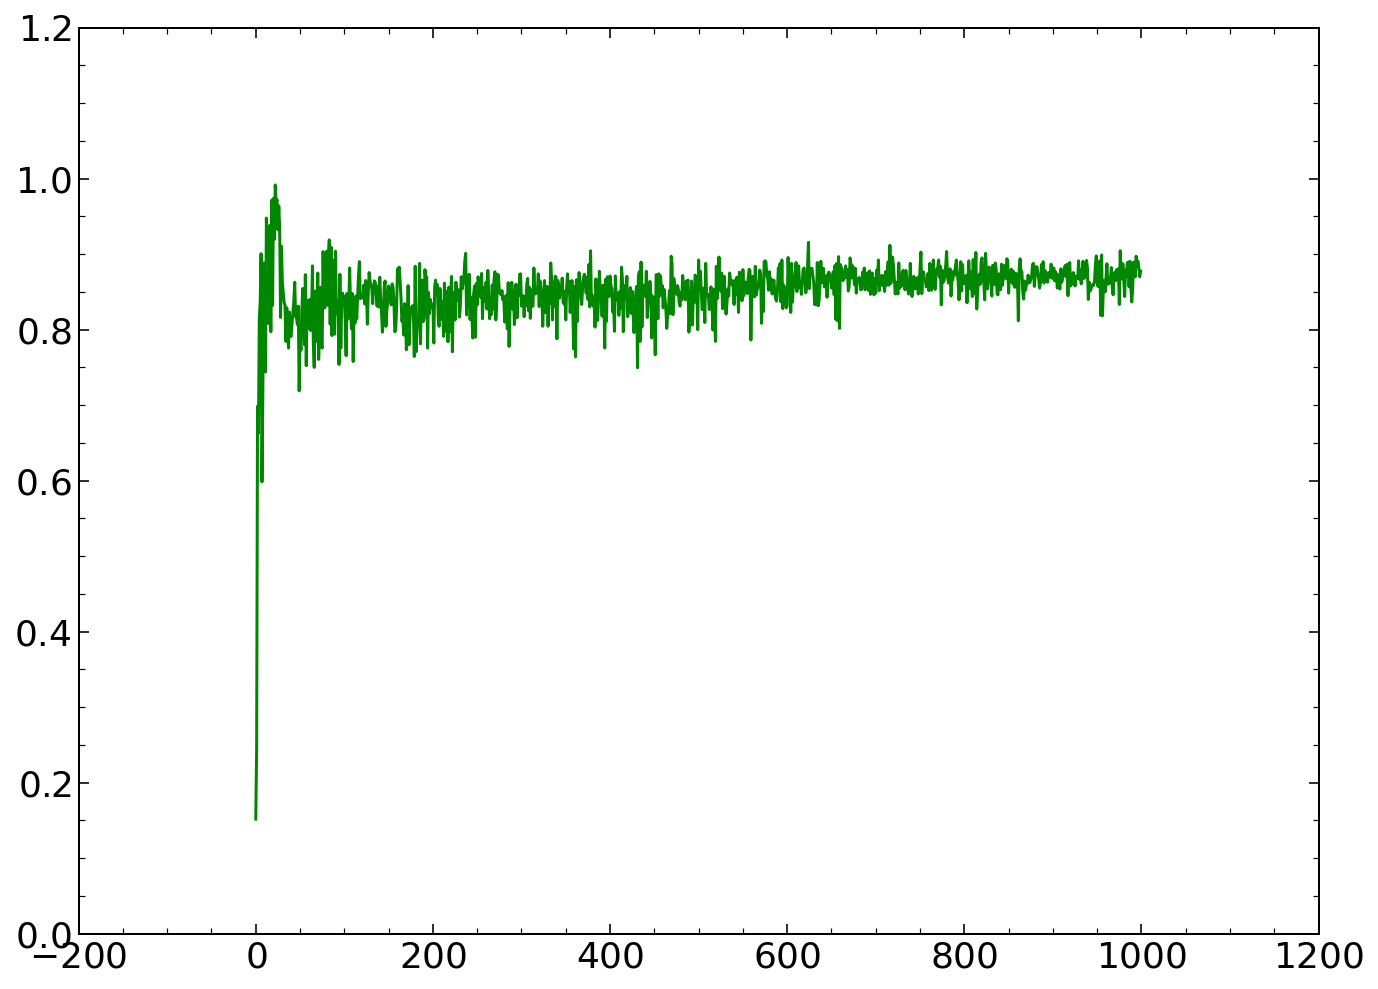

In [38]:
import matplotlib.pyplot as plt
plt.plot(history['test_pd'])
#plt.plot(history['train_critic_loss_a'])
plt.plot(history['val_critic_loss_b'])
#plt.plot(history['train_gen_loss_a'])
plt.plot(history['val_gen_loss_b'])